In [1]:
import quandl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas_datareader import data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.preprocessing import scale
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering

In [2]:
#reading in the final data
df = pd.read_csv('final_data.csv')

In [3]:
#dropping the duplicate index column
df.drop(df.columns[0],axis=1, inplace = True)

In [4]:
#scaling the data
dfS = pd.DataFrame()
dfS['SP week %change'] = scale(df['SP week %change'])
dfS['SP5 MACD'] = scale(df['SP5 MACD'])
dfS['USDX %change'] = scale(df['USDX %change'])
dfS['USTB %change'] = scale(df['USTB %change'])
dfS['sp volatility'] = scale(df['sp volatility'])
dfS['DJI MACD'] = scale(df['DJI MACD'])
dfS['Bull-Bear Spread'] = scale(df['Bull-Bear Spread'])
dfS['cat bull-bear'] = df['cat bull-bear']
dfS['IXIC MACD'] = scale(df['IXIC MACD'])
dfS['Date'] = df['Date']

In [5]:
#creating a separate class dataset
dfY = dfS[['Bull-Bear Spread','cat bull-bear']]

In [6]:
#creating a separate feature dataset
dfX = dfS.drop(dfY,axis=1)
dfX.drop('Date',axis=1,inplace = True)

#creating another feature dataset without the S&P500 MACD
dfXX = dfX.drop('SP5 MACD', axis=1)

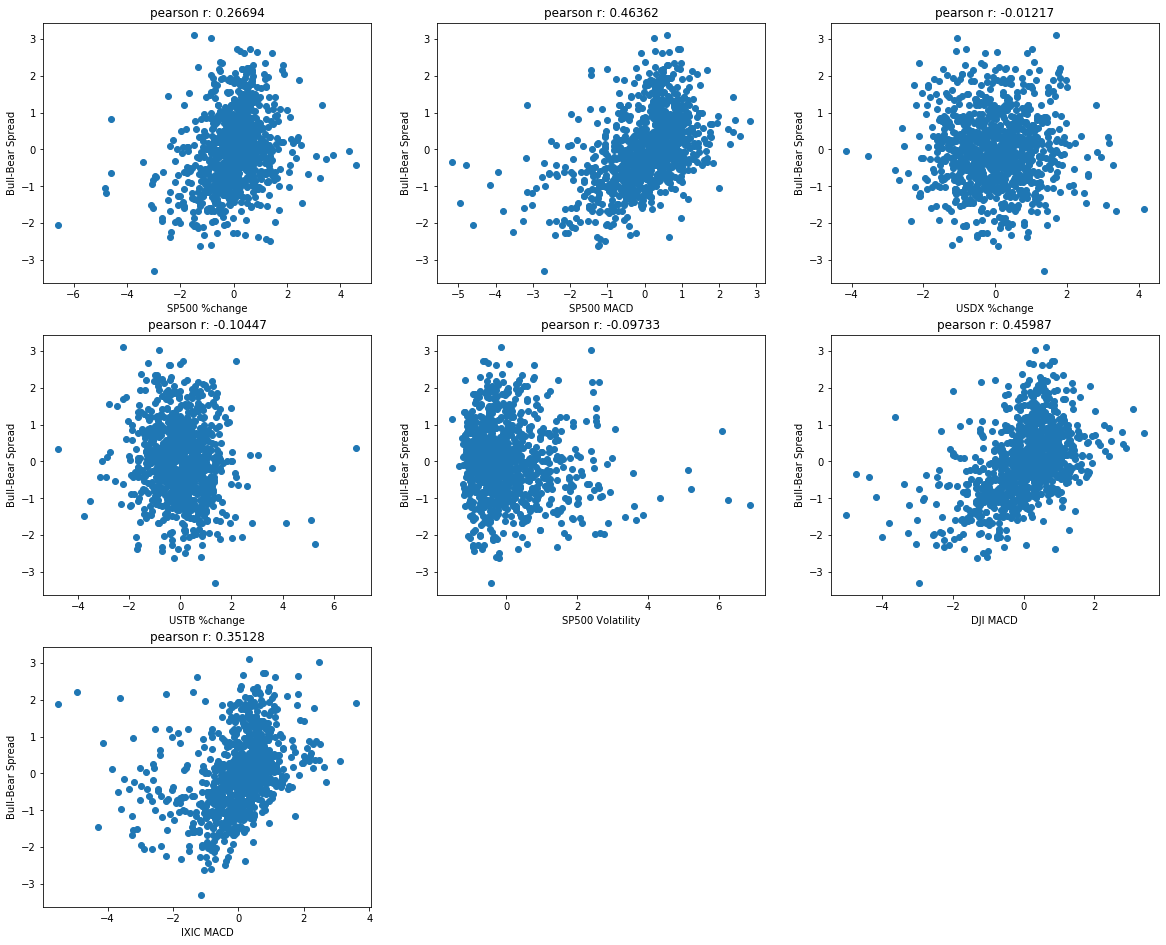

In [7]:
#renaming variables for plotting purposes
dfX1 = dfX.rename(columns={'SP week %change': 'SP500 %change','SP5 MACD':'SP500 MACD',
                           'sp volatility':'SP500 Volatility'})

#creating the figure space
fig, axes = plt.subplots(figsize=(20, 22))
fignum = 1

#generating the subplots of each feature against the non-discrete class
for i in dfX1:
    ax = plt.subplot(4,3,fignum)
    ax.scatter(dfX1[i],dfY['Bull-Bear Spread'])
    ax.set_xlabel(i)
    ax.set_ylabel('Bull-Bear Spread')
    plt.title('pearson r: '+ str(round(np.corrcoef(dfX1[i],dfY['Bull-Bear Spread'])[0][1],5)))
    fignum+=1
    
#saving the image    
plt.savefig('correlations.png')

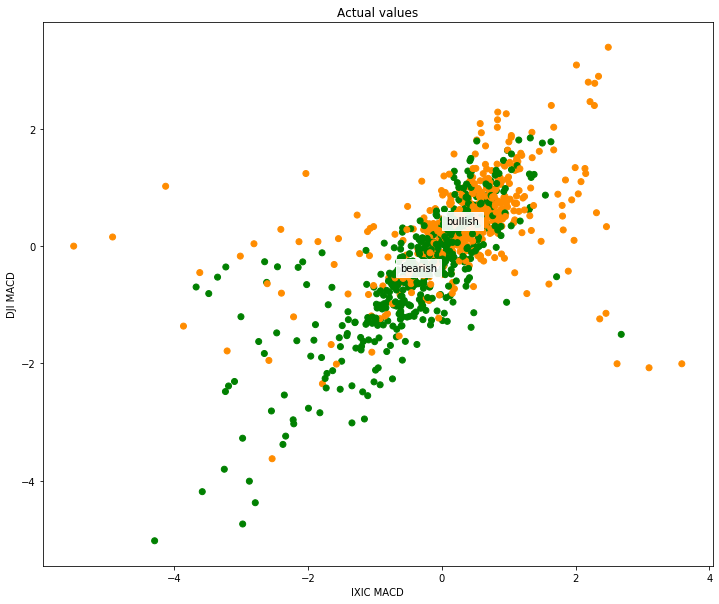

In [8]:
#Plotting the actual class values using the DJI MACD and the IXIC MACD

X = dfX
y = dfY['cat bull-bear']

fig, ax = plt.subplots(figsize=(12,10))

colors = ['green','darkorange']

#scatter plot using the class values as the color
ax.scatter(X['IXIC MACD'],X['DJI MACD'], c=y, cmap=matplotlib.colors.ListedColormap(colors))

#adding the means of the features for each class value to the plot as labels
for name, label in [('bearish', 0),
                    ('bullish', 1)]:
    ax.text(X.loc[y == label, 'IXIC MACD'].mean(),
            X.loc[y == label, 'DJI MACD'].mean(),
            name,
            horizontalalignment='center',
            bbox=dict(alpha=.9, edgecolor='w', facecolor='w'))

#setting axis labels and title
ax.set_xlabel('IXIC MACD')
ax.set_ylabel('DJI MACD')
ax.set_title('Actual values')

#saving image
plt.savefig('Actual values.png')

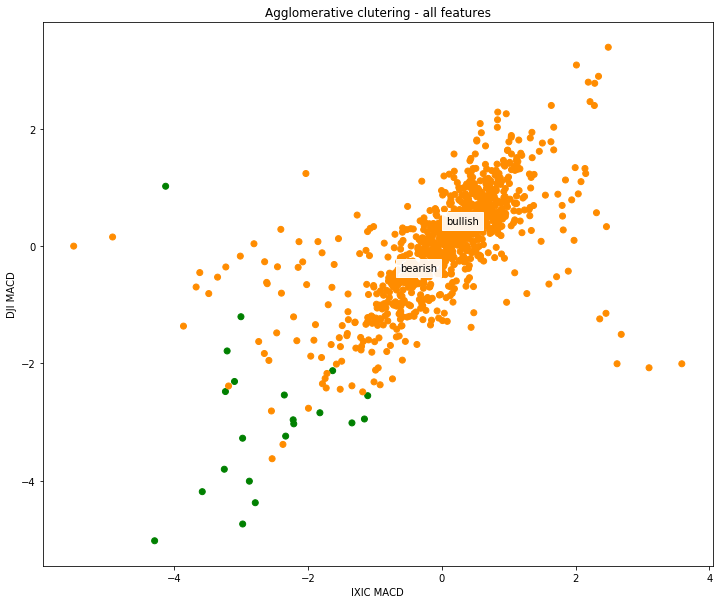

In [9]:
#Agglomerative clustering using all features

X = dfX
y = dfY['cat bull-bear']

#fitting the feautres to the model using 2 clusters
agg = AgglomerativeClustering(n_clusters=2, linkage = 'complete')
agg.fit(X)

colors = ['darkorange','green']

#plotting the scatter plot using the cluster labels as the colors
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(X['IXIC MACD'],X['DJI MACD'], c=agg.labels_, cmap=matplotlib.colors.ListedColormap(colors))

#adding the means of the features for each class value to the plot as labels
for name, label in [('bearish', 0),
                    ('bullish', 1)]:
    ax.text(X.loc[y == label, 'IXIC MACD'].mean(),
            X.loc[y == label, 'DJI MACD'].mean(),
            name,
            horizontalalignment='center',
            bbox=dict(alpha=.9, edgecolor='w', facecolor='w'))

#setting axis labels and title
ax.set_xlabel('IXIC MACD')
ax.set_ylabel('DJI MACD')
ax.set_title('Agglomerative clutering - all features')

#saving image
plt.savefig('agg all.png')

In [10]:
#Accuracy test

#0 was assigned to the orange and 1 was assigned to the greed
#in order to conduct the accuracy test I had to reverse these so they aligned with the colors of the actual values

aglabs = []
for i in agg.labels_:
    if i == 0:
        aglabs.append(1)
    if i == 1:
        aglabs.append(0)

#calculating the accuracy
np.average(aglabs==y)

0.5464646464646464

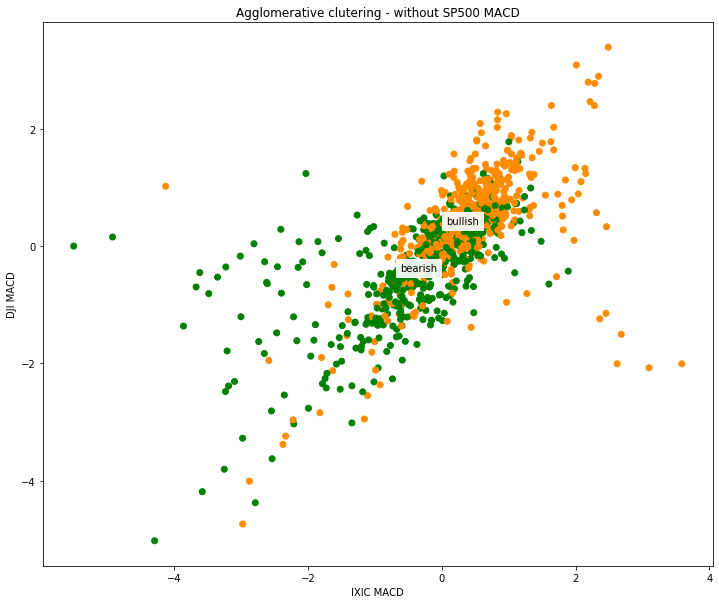

In [11]:
#Agglomerative clustering without S&P500 MACD

X = dfXX
y = dfY['cat bull-bear']

#fitting the feautres to the model using 2 clusters
agg2 = AgglomerativeClustering(n_clusters=2, linkage = 'complete')
agg2.fit(X)

colors = ['darkorange','green']

#plotting the scatter plot using the cluster labels as the colors
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(X['IXIC MACD'],X['DJI MACD'], c=agg2.labels_, cmap=matplotlib.colors.ListedColormap(colors))

#adding the means of the features for each class value to the plot as labels
for name, label in [('bearish', 0),
                    ('bullish', 1)]:
    ax.text(X.loc[y == label, 'IXIC MACD'].mean(),
            X.loc[y == label, 'DJI MACD'].mean(),
            name,
            horizontalalignment='center',
            bbox=dict(alpha=.9, edgecolor='w', facecolor='w'))

#setting labels and title
ax.set_xlabel('IXIC MACD')
ax.set_ylabel('DJI MACD')
ax.set_title('Agglomerative clutering - without SP500 MACD')

#saving image
plt.savefig('agg wo sp5macd.png')

In [12]:
aglabs2 = []
for i in agg2.labels_:
    if i == 0:
        aglabs2.append(1)
    if i == 1:
        aglabs2.append(0)

#calculating the accuracy
np.average(aglabs2==y)

0.5797979797979798

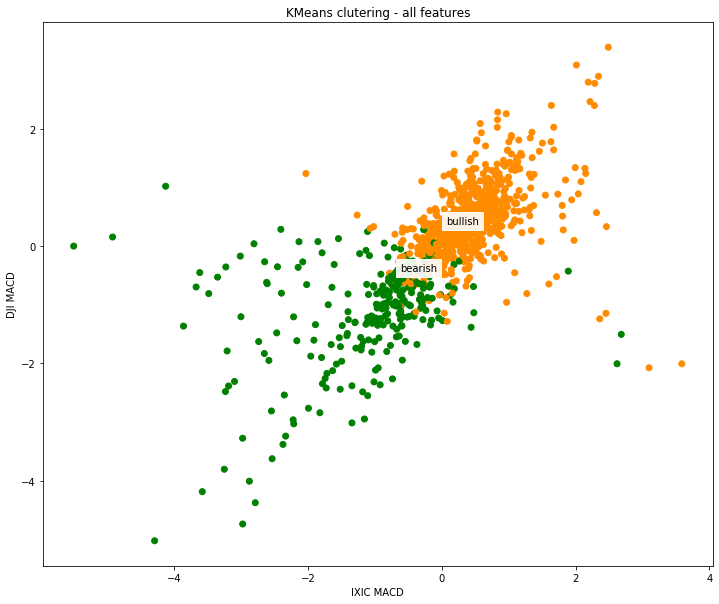

In [14]:
#KMeans clustering using all features

X = dfX
y = dfY['cat bull-bear']

#fitting the feautres to the model using 2 clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

colors = ['green','darkorange']

#plotting the scatter plot using the cluster labels as the colors
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(X['IXIC MACD'],X['DJI MACD'], c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors))

#adding the means of the features for each class value to the plot as labels
for name, label in [('bearish', 0),
                    ('bullish', 1)]:
    ax.text(X.loc[y == label, 'IXIC MACD'].mean(),
            X.loc[y == label, 'DJI MACD'].mean(),
            name,
            horizontalalignment='center',
            bbox=dict(alpha=.9, edgecolor='w', facecolor='w'))

#setting axis labels and title
ax.set_xlabel('IXIC MACD')
ax.set_ylabel('DJI MACD')
ax.set_title('KMeans clutering - all features')

#saving image
plt.savefig('kmeans all.png')

In [15]:
#calculating the accuracy
np.average(kmeans.labels_==y)

0.6676767676767676

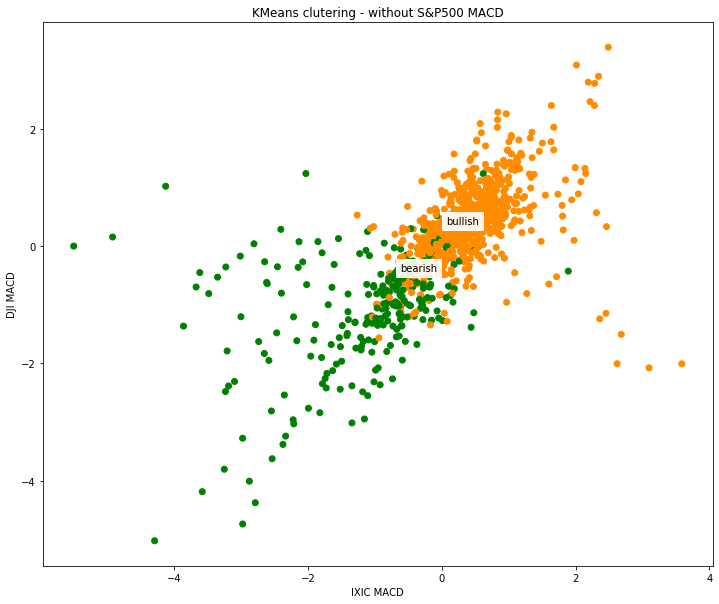

In [42]:
#KMeans clustering without S&P500 MACD

X = dfXX
y = dfY['cat bull-bear']

#fitting the feautres to the model using 2 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(X)

colors = ['green','darkorange']

#plotting the scatter plot using the cluster labels as the colors
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(X['IXIC MACD'],X['DJI MACD'], c=kmeans2.labels_, cmap=matplotlib.colors.ListedColormap(colors))

#adding the means of the features for each class value to the plot as labels
for name, label in [('bearish', 0),
                    ('bullish', 1)]:
    ax.text(X.loc[y == label, 'IXIC MACD'].mean(),
            X.loc[y == label, 'DJI MACD'].mean(),
            name,
            horizontalalignment='center',
            bbox=dict(alpha=.9, edgecolor='w', facecolor='w'))

#setting axis labels and title
ax.set_xlabel('IXIC MACD')
ax.set_ylabel('DJI MACD')
ax.set_title('KMeans clutering - without S&P500 MACD')

#saving image
plt.savefig('kmeans wo sp5macd.png')

In [43]:
#calculating the accuracy
np.average(kmeans2.labels_==y)

0.6525252525252525

In [18]:
#defining the decision boundry plotting function

def plot_decision_boundary(model, X, y, t,xl,yl, stepsize=.05):
    cmap_light = ListedColormap(['#FFAAAA', '#BBFFBB', '#AAAAFF'])  # color map for background
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # color map for points
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepsize),
                         np.arange(y_min, y_max, stepsize))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = [12,10])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
    plt.title(t)
    plt.xlabel(xl)
    plt.ylabel(yl)

In [19]:
#using only the IXIC and DJI MACDs for the KNN classification
X1 = dfX[['IXIC MACD','DJI MACD']]
y = dfY['cat bull-bear']

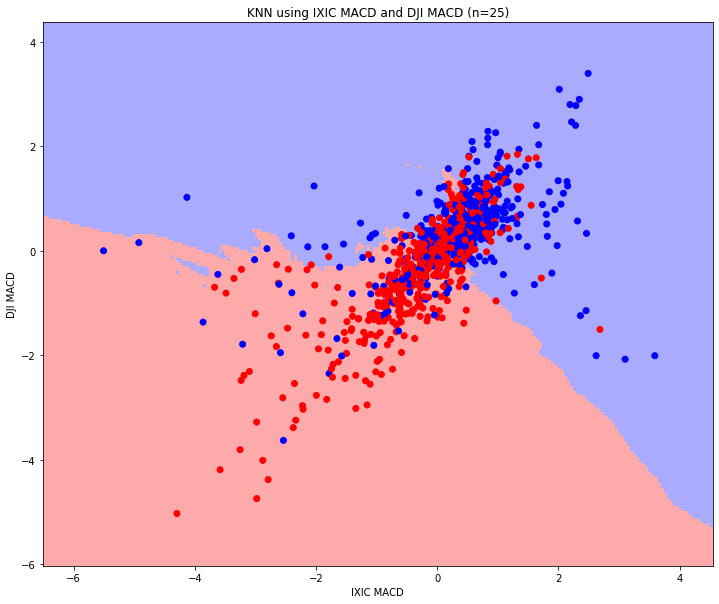

In [20]:
#fitting KNN to the features and the class values and then plotting the results 
knn1 = KNeighborsClassifier(n_neighbors=25)

k1 = knn1.fit(X1,y)
plot_decision_boundary(k1, X1, y, t='KNN using IXIC MACD and DJI MACD (n=25)', xl='IXIC MACD',yl='DJI MACD')
plt.savefig('knn orig')


In [21]:
#total accuracy of this classification
ypred1 = knn1.predict(X1)
np.average(ypred1 == y)

0.7373737373737373

In [26]:
#list for storing train-test accuracies
accs1 = []

In [27]:
#conducting train-test accuracies
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
    knn1.fit(X_train,y_train)
    ypred = knn1.predict(X_test)
    ac=np.average(ypred == y_test)
    accs1.append(ac)


In [28]:
#all train-test accuracies
accs1

[0.7474747474747475,
 0.7171717171717171,
 0.702020202020202,
 0.702020202020202,
 0.7575757575757576,
 0.7272727272727273,
 0.7171717171717171,
 0.7171717171717171,
 0.7121212121212122,
 0.7474747474747475]

In [29]:
#average train-test accuracy
np.average(accs1)

0.7247474747474747

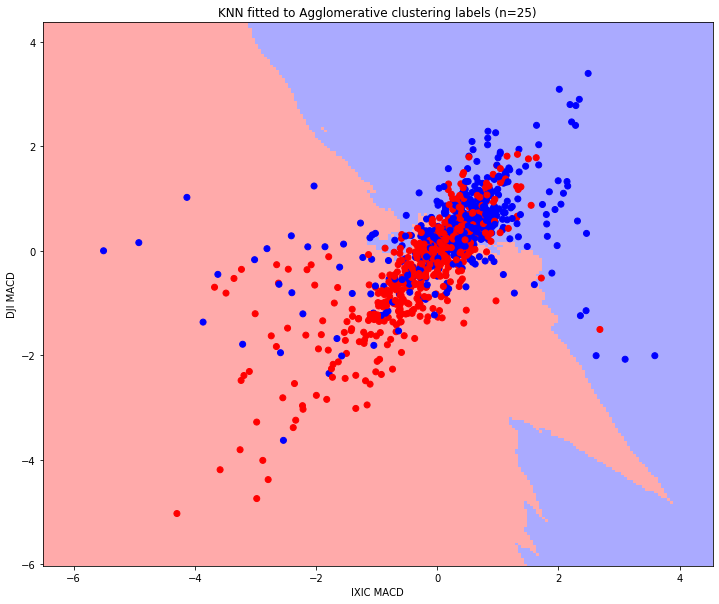

In [30]:
#using the agglomerative clustering labels to fit the KNN model and then plotting the results
knn2 = KNeighborsClassifier(n_neighbors=25)

k2 = knn2.fit(X1,aglabs2)
plot_decision_boundary(k2, X1, y,t='KNN fitted to Agglomerative clustering labels (n=25)', 
                       xl='IXIC MACD',yl='DJI MACD')

plt.savefig('knn agg')

In [31]:
#total accuracy of this classification
ypred2 = knn2.predict(X1)
np.average(ypred2 == y)

0.6565656565656566

In [32]:
#list for storing train-test accuracies
accs2 = []

#creating a datafrom of the agglomerative labels in order to use them as training data by merging them with the 
#X training data
aglab = pd.DataFrame()
aglab['agg labels'] = aglabs2

In [33]:
#conducting train-test accuracies
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
    t_ag = X_train.merge(aglab, left_index=True, right_index=True)['agg labels']
    knn2.fit(X_train,t_ag)
    ypred = knn2.predict(X_test)
    ac=np.average(ypred == y_test)
    accs2.append(ac)

In [34]:
#all train-test accuracies
accs2

[0.6818181818181818,
 0.6515151515151515,
 0.6313131313131313,
 0.6666666666666666,
 0.7222222222222222,
 0.6666666666666666,
 0.702020202020202,
 0.6565656565656566,
 0.6565656565656566,
 0.6666666666666666]

In [35]:
#average train-test accuracy
np.average(accs2)

0.6702020202020202

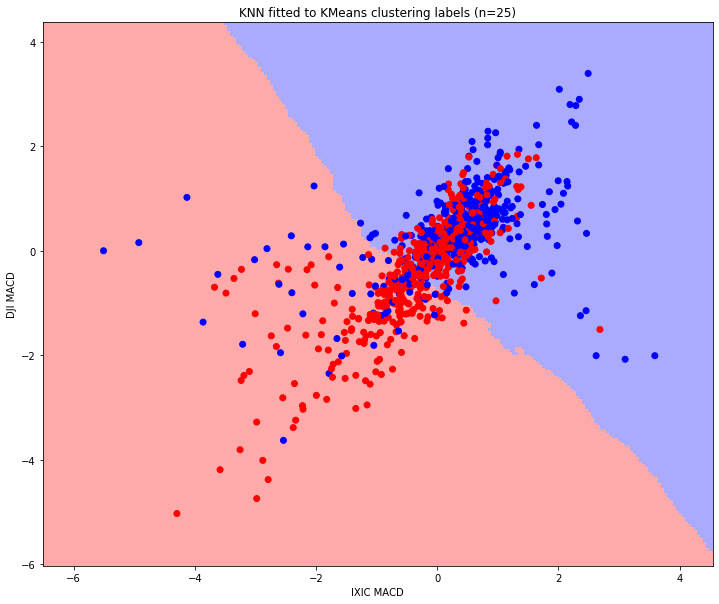

In [44]:
#using the KMeans clustering labels to fit the KNN model and then plotting the results
knn3 = KNeighborsClassifier(n_neighbors=25)

k3 = knn3.fit(X1,kmeans.labels_)
plot_decision_boundary(k3, X1, y,t='KNN fitted to KMeans clustering labels (n=25)', 
                       xl='IXIC MACD',yl='DJI MACD')

plt.savefig('knn agg')

In [45]:
#total accuracy of this classification
ypred3 = knn3.predict(X1)
np.average(ypred3 == y)

0.6757575757575758

In [38]:
#list for storing train-test accuracies
accs3 = []

#creating a datafrom of the KMeans labels in order to use them as training data by merging them with the 
#X training data
klab = pd.DataFrame()
klab['km labels'] = kmeans2.labels_

In [39]:
#conducting train-test accuracies
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
    t_km = X_train.merge(klab, left_index=True, right_index=True)['km labels']
    knn3.fit(X_train,t_km)
    ypred = knn3.predict(X_test)
    ac=np.average(ypred == y_test)
    accs3.append(ac)

In [40]:
#all train-test accuracies
accs3

[0.6717171717171717,
 0.6515151515151515,
 0.6565656565656566,
 0.6919191919191919,
 0.6565656565656566,
 0.6919191919191919,
 0.6818181818181818,
 0.7272727272727273,
 0.6414141414141414,
 0.6717171717171717]

In [41]:
#average train-test accuracy
np.average(accs3)

0.6742424242424242